<a href="https://colab.research.google.com/github/paradkarpravin15/Salary_Prediction_Model/blob/main/Salary_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction Model - Linear Regression Algorithm


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
print(df.tail())

    Unnamed: 0  YearsExperience    Salary
25          25              9.1  105583.0
26          26              9.6  116970.0
27          27              9.7  112636.0
28          28             10.4  122392.0
29          29             10.6  121873.0


In [5]:
print(df.shape)

(30, 3)


In [114]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [116]:
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


In [9]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [10]:
# Check for duplicate rows
print("Number of Duplicate Rows:",end=" ")
print(df.duplicated().sum())

Number of Duplicate Rows: 0


In [11]:
# Unique values in each column
print("Unique values per column:")
for col in df.columns:
  print(f"{col}: {df[col].nunique()} unique values")

Unique values per column:
YearsExperience: 28 unique values
Salary: 30 unique values


In [12]:
print(df.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


In [13]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


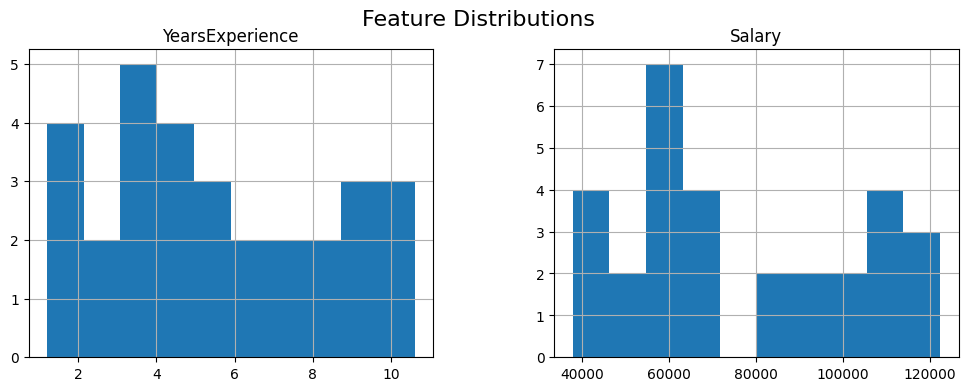

In [53]:
# Histogram for numerical columns
df.hist(figsize=(12, 4), bins=10)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

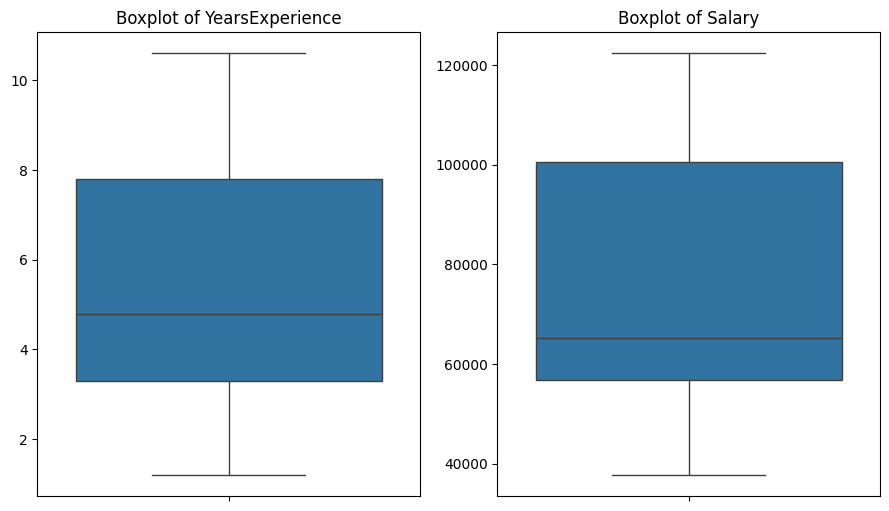

In [63]:
# Boxplot for numerical features to check for outliers
plt.figure(figsize=(9,10))
for i, col in enumerate(df, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df, y=col)
  plt.title(f"Boxplot of {col}")
  plt.ylabel("")
plt.tight_layout()
plt.show()

*   In this dataset outliers are not present.

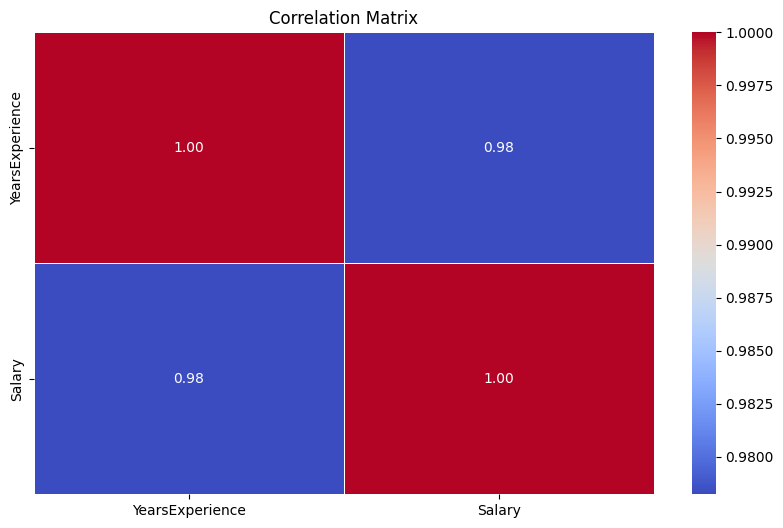

In [16]:
# Plot heatmap to visualize check correlation between numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

## Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [18]:
# Create separate copies of the dataset for each scaling method
df_minmax = df.copy()
df_standard = df.copy()
df_robust = df.copy()

In [20]:
# Selecting only numerical columns for scaling
num_cols = df.columns

In [24]:
# Min-Max Sacling (0 to 1 range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

In [117]:
# Display random five rows from dataset
print(df_minmax.sample(5))

    YearsExperience    Salary
17         0.446809  0.535755
22         0.723404  0.750898
8          0.223404  0.315545
21         0.638298  0.715119
16         0.425532  0.334255


In [36]:
# Standardize features for model training (Mean=0, Std=1)
standard_scaler = StandardScaler()
df_standard[num_cols] = standard_scaler.fit_transform(df_standard[num_cols])

In [38]:
# Display random five rows from dataset
print(df_standard.sample(5))

    YearsExperience    Salary
14        -0.291498 -0.552504
22         0.927058  0.938611
13        -0.434857 -0.702020
17        -0.004779  0.262859
28         1.787215  1.721028


In [40]:
# Robust Scaling
robust_scaler = RobustScaler()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])

In [42]:
# Display random five rows from dataset
print(df_robust.sample(5))

    YearsExperience    Salary
9         -0.222222 -0.183644
0         -0.800000 -0.590863
11        -0.155556 -0.215476
6         -0.377778 -0.116078
24         0.888889  1.008443


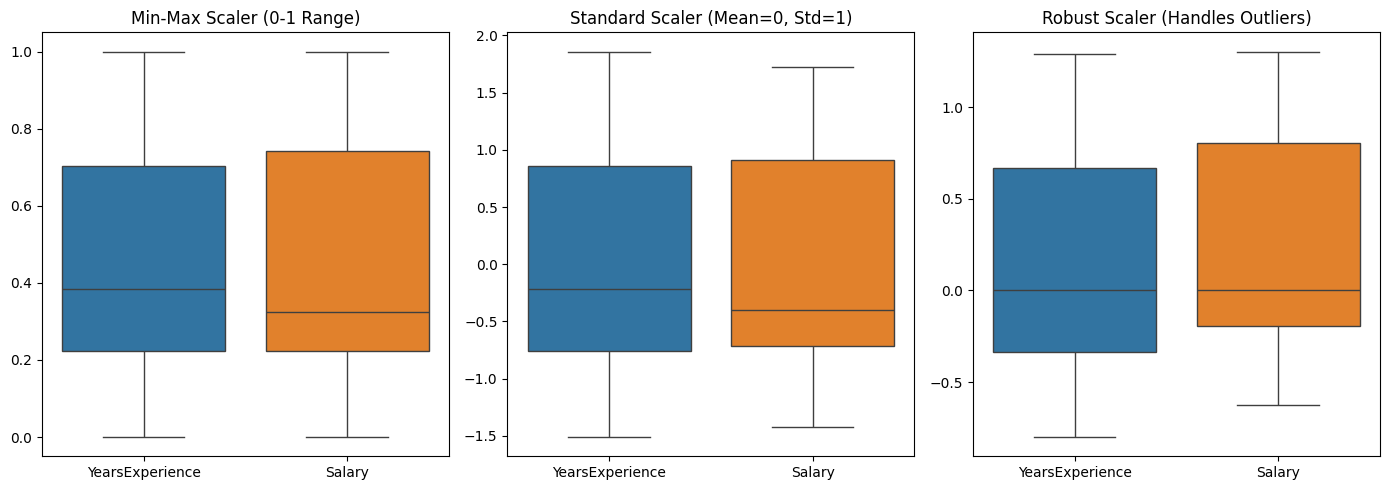

In [62]:
# Visualizing the difference
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

#MinMaax Scaler
sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title("Min-Max Scaler (0-1 Range)")

# Standard Scaler
sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaler (Mean=0, Std=1)")

# Robust Scaler
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title("Robust Scaler (Handles Outliers)")
plt.tight_layout()
plt.show()

# Data Splitting (Train-Test Split)

In [65]:
from sklearn.model_selection import train_test_split

In [94]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Salary'])  # features
y = df['Salary']   # target variable

In [95]:
print(X)

    YearsExperience
0               1.2
1               1.4
2               1.6
3               2.1
4               2.3
5               3.0
6               3.1
7               3.3
8               3.3
9               3.8
10              4.0
11              4.1
12              4.1
13              4.2
14              4.6
15              5.0
16              5.2
17              5.4
18              6.0
19              6.1
20              6.9
21              7.2
22              8.0
23              8.3
24              8.8
25              9.1
26              9.6
27              9.7
28             10.4
29             10.6


In [96]:
print(y)

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
print(X.shape, X_train.shape, X_test.shape)

(30, 1) (24, 1) (6, 1)


# Model Training

Linear Regression Model

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
# loading linear regression model
lr_model = LinearRegression()

In [101]:
# train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [120]:
# Make predictions on test data
y_pred_lr = lr_model.predict(X_test)
print("\nPredication:\n", y_pred_lr.round(2))


Predication:
 [ 38195.33 123288.02  48369.45  65942.94  69642.63  65018.02]


In [119]:
# Print the model coefficients
print("Model coefficients:", lr_model.coef_.round(2))
print("\nIntercept:", lr_model.intercept_.round(2))

Model coefficients: [9249.21]

Intercept: 27096.28


In [121]:
print("Linear Regression Performance")
print(f"Accuracy Score:",lr_model.score(X_test,y_test)*100)

Linear Regression Performance
Accuracy Score: 93.41177447940323


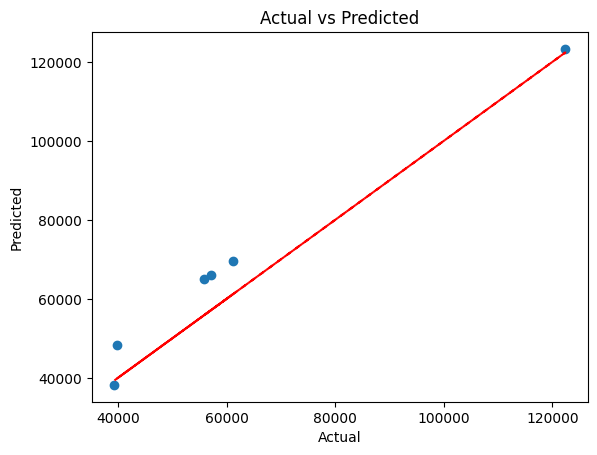

In [129]:
# Scatter plot for Actual vs Predicted
plt.scatter(y_test, y_pred_lr)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Model Evaluation

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [124]:
# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test,y_pred_lr))
print("RMSE:", mean_squared_error(y_test,y_pred_lr))
print("R2 Score:", r2_score(y_test,y_pred_lr))

MAE: 6189.4561179277525
MSE: 51723593.16984139
RMSE: 51723593.16984139
R2 Score: 0.9341177447940323


In [125]:
for name, coef in zip(X.columns, lr_model.coef_):
  print(f"{name}: {coef}")

YearsExperience: 9249.205578277664
